# **Estadística Aplicada** #
## Andrea Carolina López Ruiz ##
**22 febrero - Sesión 7**

In [2]:
# Instalamos las librerias
!pip install lifelines

     -------------------------------------- 349.7/349.7 kB 3.6 MB/s eta 0:00:00
     ---------------------------------------- 77.1/77.1 kB ? eta 0:00:00
     ---------------------------------------- 48.9/48.9 kB ? eta 0:00:00
  Preparing metadata (setup.py): started
  Preparing metadata (setup.py): finished with status 'done'
  Created wheel for autograd-gamma: filename=autograd_gamma-0.5.0-py3-none-any.whl size=4032 sha256=6dbd29e701933ff6097e6c9fcfb2cfa88a772d81f906d8aef99ace0d47a1b3f5
  Stored in directory: c:\users\evanp\appdata\local\pip\cache\wheels\a8\03\64\8557323821d25118c3a2dc1646996f7a962a8970d4b7d22473
Successfully built autograd-gamma


In [3]:
# importamos las librerias
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from lifelines import ExponentialFitter
%matplotlib inline

In [4]:
# Datos
dic1 = {'tiempo': [5,8,12,24,32,17,16,17,19,30], 
       'evento': [1,1,1,1,1,1,0,0,0,0]}

In [5]:
# convertimos los datos de diccionario a dataframe
datos = pd.DataFrame(dic1)
datos

,tiempo,evento
0,5,1
1,8,1
2,12,1
3,24,1
4,32,1
5,17,1
6,16,0
7,17,0
8,19,0
9,30,0


## Estimador de Máxima Verosimilitud Lambda ##
$x=0$
$$y=1$$
$\hat{\lambda} = {\sum \delta_i \over \sum t_i}$


In [18]:
# calculamos la tasa de riesgo
lambda_exp = datos['evento'].sum() / datos['tiempo'].sum()
lambda_exp

0.03333333333333333

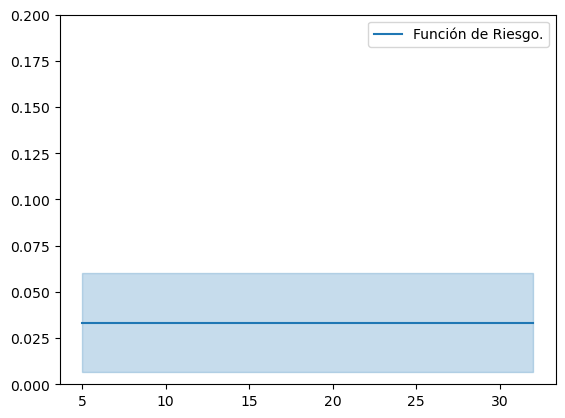

In [7]:
# graficamos la funcion de riesgo
ex1 = ExponentialFitter().fit(datos['tiempo'], datos['evento'])
ex1.plot_hazard(label = 'Función de Riesgo.').legend()
plt.ylim(0, 0.2)
plt.show()

# la linea es la funcion de riesgo, esta es constante.
# el area sombreada es el intervalo de confianza al 95%.

In [8]:
# calculamos la probabilidad de no recaer en 16 meses
ex1.survival_function_at_times(16)

16    0.586646
Name: Exponential_estimate, dtype: float64

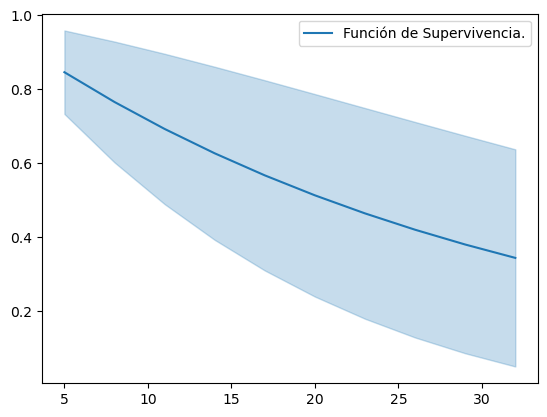

In [9]:
# graficamos la funcion de supervivencia
ex1.plot_survival_function(label = "Función de Supervivencia.");

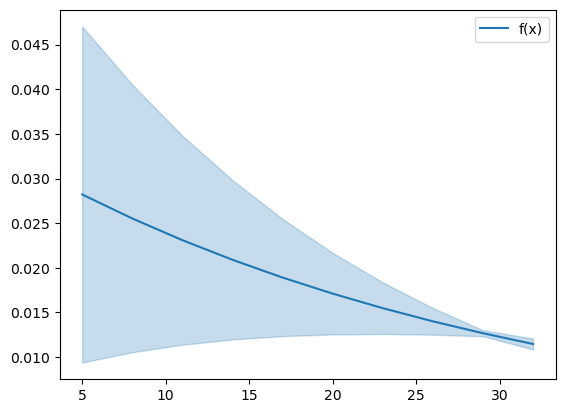

In [10]:
# graficamos la función de probabilidad f(t)
ex1.plot_density(label = "f(x)");

<AxesSubplot:>

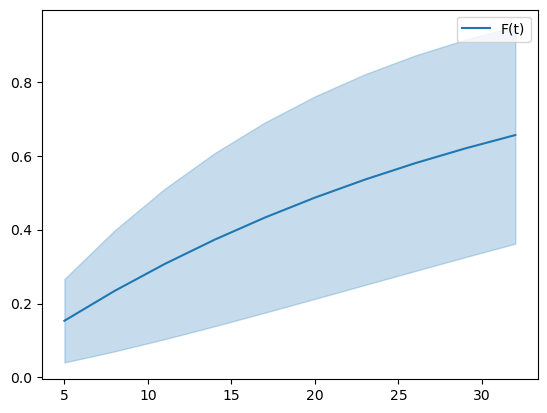

In [11]:
# graficamos la funcion de probabilidad acumulada F(t)
ex1.plot_cumulative_density(label = "F(t)")

In [12]:
# calculamos la mediana
ex1.median_survival_time_

20.794415437592868

In [13]:
# la mediana signfica que el 50% de los individuos sufren un evento antes del valor de la mediana
# en este caso, la mediana significa que el 50% de los individuos recae antes de 20.8 meses.

In [14]:
# resumen
ex1.summary

,coef,se(coef),coef lower 95%,coef upper 95%,cmp to,z,p,-log2(p)
lambda_,30.0,12.247449,5.995442,54.004558,0.0,2.44949,0.014306,6.127248


In [15]:
# calculamos lambda
1/ex1.lambda_

0.03333333329999985

In [16]:
0.03333333329999985
#riesgo para cada intervalo de tiempo
ex1.hazard_

,Exponential_estimate
5.0,0.033333
8.0,0.033333
11.0,0.033333
14.0,0.033333
17.0,0.033333
20.0,0.033333
23.0,0.033333
26.0,0.033333
29.0,0.033333
32.0,0.033333
